<h1 align="center"> Promising coordinates for new Toronto salons </h1>
<h3 align="center"> Tim McCormick </h3>
<h4 align="center"> August 14, 2020 </h4>



## 1. Introduction

### 1.1 Background

A friend recently told me she was leaving the salon where she had worked for many years in order to open her own salon business elsewhere in her city. Her current (and target) clients are young, urban, professional women. For that reason, she explained, she wanted to find a location where customers spend money: not a strictly residential area of her city, nor an area with strictly office buildings or industries. A neighborhood with considerable foot traffic throughout the week and considerable consumer spending. Finding that ideal neighborhood could utilize on familiarity with a city, but even intuitions and familiarity should be supported with data-driven approaches. In this lies the goal of this report.

Follow my step-by-step approach [here](https://github.com/tjmccormick5/Coursera_Capstone/blob/master/Toronto_Salons.ipynb).

### 1.2 Problem

Familiarity with a city and its real estate market are helpful to drive the process of looking for an available store-front in situations such as the case of the business owner presented above. However, needless to say, cities like Toronto are very large. Preconceptions may drive salon owners' instincts to locate in areas where there is already an abundance of competition, leaving other neighborhoods with high demand. Residents may have to settle for a lower quality cut in their own neighborhood, or else go farther distances to a salon (and in addition to the time cost, travel presents other costs such as parking or mass transit). 

At the same time, a new business owner does not want to arbitrarily locate a new salon at the most distant point from other salons. Euclidean distance alone will likely lead to the client looking to open a salon in sparsely populated sections of the city. Population density is not homogenous throughout cities like Toronto, which contain population hubs. These densities are reflected in the density of postal codes (given that each postal code serves roughly the same number of residents) and of certain venues. 

In addition to postal codes, to operationalize this second component of the question, I will use restaurants as a stand-in for 'disposable income being spent'. As the cliché goes, "location is everything" in the restaurant industry: dense pockets of restaurants indicate that there is enough clientele to keep these restaurants in business. 

This data can be used as for cross referencing: what areas of the city have high population density (or at least, high consumer spending) with low competition in the haircare industry? This report provides a data-driven location recommendation with neither a superfluity of existing salons nor a dearth of disposable income being spent. 

### 1.3 Interest

This report will provide a methodology to implement to find promising neighborhood(s) to locate a new business. While the report considers salons, these are merely an instance of the many ways to apply this methodology, because the parameters are easily altered to adjust for the particulars of the business in question. 

The report will use geospatial data from Toronto businesses obtained from Foursquare. Two methods will be presented: one is a simple process of elimination while the other uses machine learning strategies (namely, DBSCAN). Both of these methods are presented to provide two different perspectives and to facilitate future transferability of the methodology to similar research questions. 


## 2. Data acquisition and cleaning

### 2.1 Data sources

In this analysis, I leveraged the [Foursquare location data](https://foursquare.com/developers/apps) for Toronto venues, namely restaurants and salons. I also used the [Toronto postal codes](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M), which provided the initial geospatial coordinates for which to request the data from Foursquare. 150 venues within 1000 meters of each postal code were requested from Foursquare, along with the venues' coordinates and category.

### 2.2 Data cleaning

This provides an abundance of data that won't be used given the research question. However, it was important to request the data broadly and then refine. The alternative (to request 150 restaurants/salons) would obscure the relative density of those venues. 

Unfortunately, not all the category data is coherently coded within Foursquare. For example, in addition to 'Salon / Barbershop', salons are categorized as 'Cosmetics', 'Spa', and other categories. Restaurant venue categories are more specific than 'Restaurant' (e.g., Afghan Restaurant), and not all categories even contain the word _restaurant_ (e.g., 'BBQ Joint'; 'Sandwich Place'). Therefore, further cleaning of the data is necessary and will play a critical role in the ultimate feature selection.

### 2.3 Feature selection

Based on a deep dive into the first 300 venues in the dataframe, I created a list of alternative venue categories that were related to salons (Some of these aren't entirely synonymous but are relevant for business intelligence). This list was used to subset the master list into only the venues whose categories matched one of the established near-synonyms. This subset was imperfect because of an overlap in the venue categories, so was further cleaned. Upon examination of the subset, some salons are categorized as "Cosmetics Shops" (e.g. Florio Hair Design). Others are exclusively retail shops (e.g., Sephora), while others still are a combination of both (e.g., Aveda Institute Toronto, where you can both buy products and/or get a haircut). I removed cases of exclusively retail shops (e.g., Sephora, Lush, etc.) by subsetting furhter.

As for restaurants, I created a list populated by key words that appeared in the category name for the first 300 venues to indicate a restaurant or food service (e.g., 'joint', 'food', 'sandwich', 'breakfast'). I then used embedded for-loops to break apart the words in the venue categories, assess if any word within the category matched a word in my keywords, and then generate a list of all of the venues that did match a keyword.

I joined the two subsets back together while maintaining their venue 'supercategory' identity as a dummy variable. 



## 3. Exploratory Data Analyses

### 3.1 Visualizing the data

To visualize the concentration of restaurants and salons within Toronto, I mapped both together, using the _folium_ package. . In the map, red signals another salon while blue signals a restaurant venue.

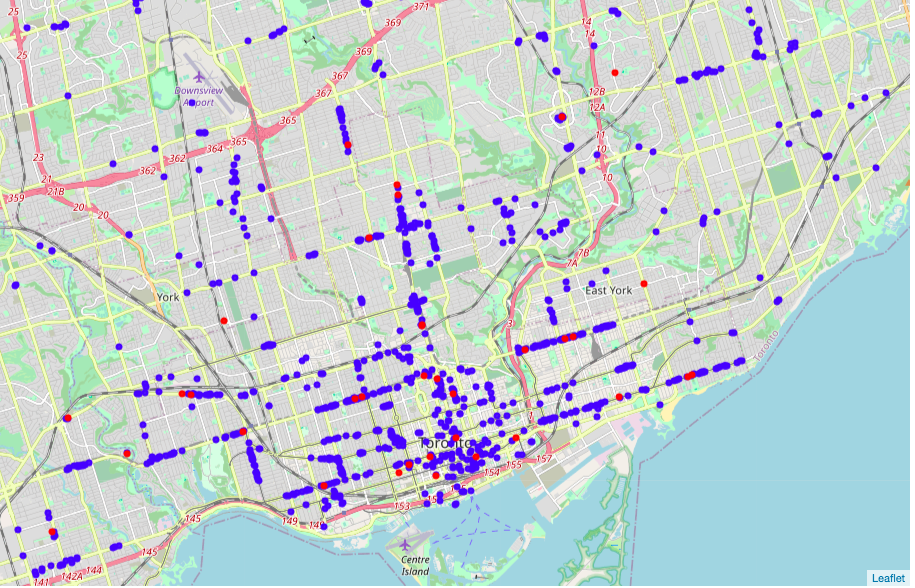

### 3.2 Postal code conditional search

One potential method for determining where to put the new salon finds the postal codes with no current salons, and of them, the postal code with the greatest number of restaurants. Remember that postal codes are indicators of roughly equal population density, so many restaurants in a given postal code but no salons would likely indicate that residents are spending money and may prefer a closer alternative for haircare. 

<h3 align="center">Table 1                   </h3>

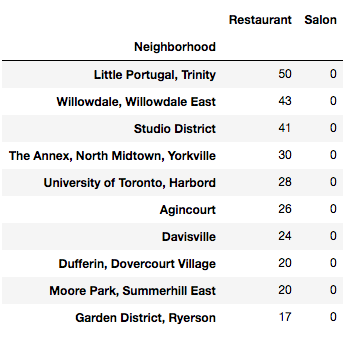

By this method, **Little Portugal, Trinity** would be a good neighborhood within which to place a salon, identified by the white marker in the map below.

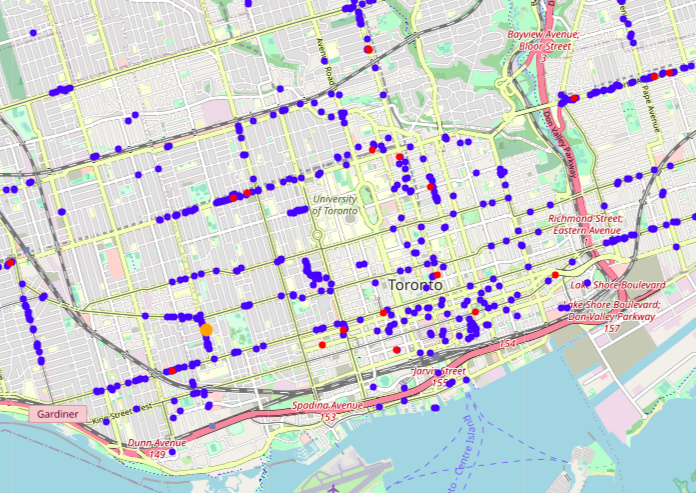

However, while postal codes are indicators of population density, their borders are often arbitrary in city centers, where residents can easily cross through multiple postal codes in a typical walking distance to arrive at their favorite venues. Indeed, the presence of a salon in a postal code does not necessarily mean that there is no demand for more, and vice versa. Thus, it warranted additional analyses to complement the findings of Table 1.  

Therefore, I complemented this process-of-elimination analysis with a machine learning approach that clusters data by density while ignoring outliers (in this case, isolated restaurants). These clusters do not abide by postal code barriers, so will be more indicative of "walkability", but all clusters will meet the same criteria in terms of restaurant density and distance. This approach, called DBSCAN (density-based spatial clustering of applications with noise), is elaborated more below.


## 4. Modeling

### 4.1 DBSCAN

DBSCAN analyses is an unsupervised machine-learning method that identifies areas of high density while ignoring outliers. The analysis will find as many analyses as meet the established parameters, so the data scientist does not need to predetermine the number of clusters, contrary to other methods like k-means. DBSCAN considers each data point and its neighbors, with the parameters established as follows: (1) *epsilon*: within what distance must another data point fall to be considered a neighbor, and (2) *minimum samples*: how many neighbors must fall within that distance to be considered a cluster?

I employed DBSCAN to identify areas of high restaurant density. While my parameters were established relatively arbitrarily (using my own estimates of walkability as epsilon and high restaurant density for minimum samples), the analyses are easily adaptable for the clients' needs. Because I looked for areas of high restaurant density and low salon density, only the restaurant location data was relevant for the DBSCAN. Existing salon locations are re-incorporated after the DBSCAN analyses.

### 4.2 Results

I established the epsilon as .408 km, which is roughly equivalent to [five city blocks](https://www.justintools.com/unit-conversion/length.php?k1=blocks&k2=kilometers) in cities on the eastern seaboard of North America. As I addressed above, I arbitrarily established the minimum samples parameter as 20. Given the longitude and latitude data, I also normalized the latitude and longitude data to be comparable (depending on your location, changes in 1 degree longitudinally are not equal to changes in 1 degree latitudinally) and I converted the epsilon to radians and used the haversine method of DBSCAN. The resulting clusters follow in Table 2.

<h3 align="center">Table 2                   </h3>

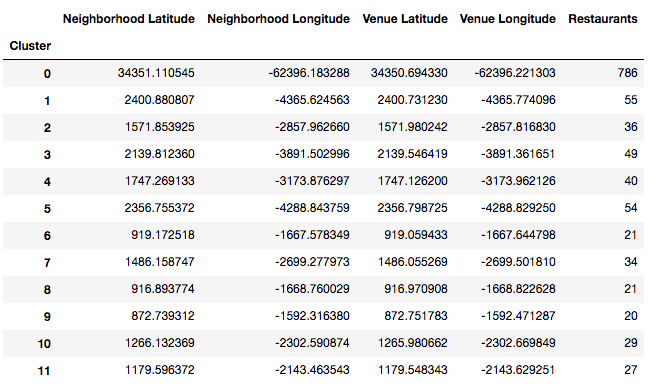

The DBSCAN clustered 1,172 coordinate pairs down to 12 clusters (including one cluster of all the outliers), for 99.0% compression rate). The silhouette coefficient, -0.188, is not pertinent for the purposes of this analysis because we are not classifying the points but rather grouping them into clusters. The clusters are idenitified in the map below by distinct colors (black identifies the outliers that did not meat the density/distance criteria). 

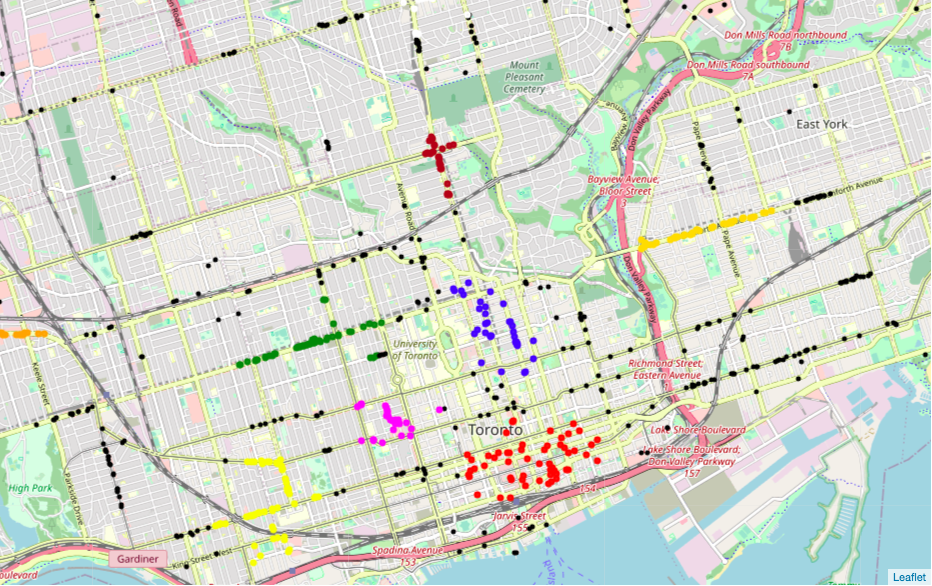

### 4.3 Cross-referencing salon data

I obtained the centroid of these clusters of restaurants using the _NearestCentroid_ from **scikitlearn**. Then, I calculated how many salons were within 1 km (euclidean distance, not manhattan distance) from the centroid. Looking at these salons granularly, some were nail or massage salons that would unlikely offer much competition, so used google to eliminate such salons, meanwhile complementing the data with average prices for a women's cut at the venues that _did_ meet the criteria. 

Finally, for reference purposes, I associated the centroid to the nearest postal code (although, this does not necessarily mean that the address of the centroid corresponds to that postal code). 

Once I obtained the centroids, I created a new dataframe, presented in Table 3, to present to the client. This dataframe contains the recommendations based on the DBSCAN results, sorted by most restaurants with fewest women-focused salons.

<h3 align="center">Table 3                  </h3>

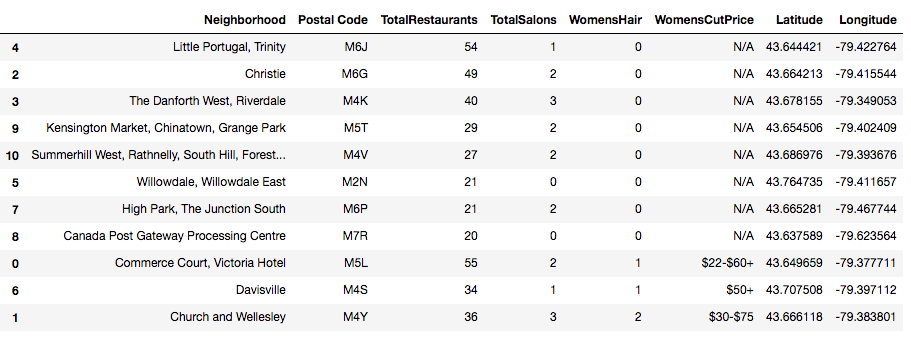

## 5. Conclusions

This report provides two methodologies that can be used to provide data-driven recommendations for geospatial coordinates of a future business with promising clientele. The methodology is based on Foursquare data that represent the target business (in this case, salons), an operationalization of consumer spending (in this case, restaurants), postal codes (an operationalization of population density). The client can use the recommendations provided to focus the real estate search, whether using the descriptive or machine learning approach. It is noteworthy that Little **Portugal, Trinity** was revealed as the best choice in both of these approaches, and several of the runners-up appear in both lists as well. This is further confirmation of the utility of the two approaches. 

As mentioned above, the machine learning approach can be adapted to the specifics of the client: how many samples in a cluster? within what distance? Thus, this methodology is not exclusive to the question answered in this report, nor merely real estate interests. On the contrary, it is very adaptable to different industries and different questions, depending on the needs of the client.